# A least-squares fitting execise in gas chromatography.

The csv file `nm2023/data/exp_data.csv` contains data from a gas chromatography experiment. The first column corresponds to the flow rate, $u$, in milli-Litre-per-minute (mL/min), and the second column corresponds to the plate height, $H(u)$, in millimeter (mm). 

Fit this data to the [van Deemter equation](https://en.wikipedia.org/wiki/Van_Deemter_equation), $H(u)=A+B/u+Cu$, and determine the diffusion parameters, $A$, $B$, and $C$. The meaning of the parameters are defined in the wiki article linked above. 

Report the following in a Jupyter notebook (rename this file as `ClassProject_vanDeemter_23Feb2023_githubhandle.ipynb`) and send it via google classroom:   
- The diffusion parameters, $A$, $B$, and $C$  
- Accuracy of your fit in terms of mean absolute deviation (MAD), root mean square deviation (RMSD), maximum absolute error (MAD), and Pearson correlation coefficient. 
- Plot the actual data along with your fitted function.


# Solution

## Codes

#    i      a_i

The fitted polynomial is 
  
6.821 


#    i      x_i           y_i             y_i (fit)      error          |error|      % error
     0     2.50505000    13.94430000     6.82069552     7.12360448     7.12360448    51.08613902
     1     4.01010000    10.12410000     6.82069552     3.30340448     3.30340448    32.62911748
     2     7.02020000     7.38571000     6.82069552     0.56501448     0.56501448     7.65010382
     3    10.03030000     6.44311000     6.82069552    -0.37758552     0.37758552     5.86029910
     4    13.04040000     5.88968000     6.82069552    -0.93101552     0.93101552    15.80757388
     5    14.54550000     4.69011000     6.82069552    -2.13058552     2.13058552    45.42719717
     6    17.55560000     5.40629000     6.82069552    -1.41440552     1.41440552    26.16222062
     7    19.06060000     5.31540000     6.82069552    -1.50529552     1.50529552    28.31951532
     8    20.56570000     5.39149000     6.82069552    -1.42920552     1.429

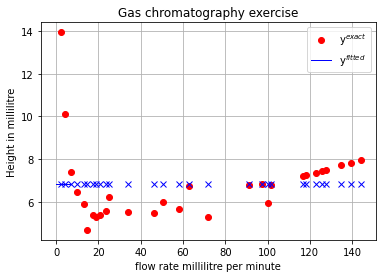

No. of data points, N:  29
Degree of the polynomial, D:  2
Mean absolute error:  1.1537733650416173
Max absolute error: 7.12360448275862
Standard deviation:   1.7505901650046305
Standard deviation using numpy:  1.7505901650046305
Pearson correlation coefficient is:  8.747576294804559e-17
Standard deviation of polynomial fit [upper bound]:  1.8488292745630768


In [5]:
import numpy as np
import matplotlib.pyplot as plt
myfile=open('../data/exp_data.csv','r')

x=np.array([])
y=np.array([])

iline=0
for line in myfile:
    if iline > 0:            
        str=line.split(',')  
        valx=eval(str[0])
        valy=eval(str[1])
        x=np.append(x,[valx])
        y=np.append(y,[valy])
        
    iline=iline+1
myfile.close() 
D=2
N=x.shape[0]

print('#    i','     a_i')
a=np.polyfit(x,y,D-2)
for i in range(D-2):
    print('{:6d}{:15.8f}'.format(i,a[i]))

p = np.poly1d(a)
print("\nThe fitted polynomial is \n",p,"\n\n")

yfit=np.polyval(a,x)

err=y-yfit
abs_err = np.abs(y-yfit)
max_abs_err=np.max(abs_err)
perc_err=np.abs( abs_err/y ) *100

print('#    i','     x_i           y_i             y_i (fit)      error          |error|      % error')
for i in range(N):
    print('{:6d}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}{:15.8f}'.format(i,x[i],y[i],yfit[i],err[i],abs_err[i],perc_err[i]))
plt.plot(x,y,'o',color='r',linewidth=1,label='y$^{exact}$')
plt.plot(x,yfit,'x',color='b',linewidth=1)
plt.grid('color=black')

xgrids=np.linspace(0,7, 51)
ygridsfit=np.polyval(a,xgrids)

plt.plot(xgrids,ygridsfit,'-',color='b',linewidth=1,label='y$^{fitted}$')

plt.legend()

plt.xlabel("flow rate millilitre per minute")
plt.ylabel("Height in millilitre")
plt.title('Gas chromatography exercise')

plt.savefig('classwork1.pdf')  

#=== display
plt.show()
print('No. of data points, N: ', N)
print('Degree of the polynomial, D: ', D)

#Mean absolute error
mae=np.mean(abs_err)
print("Mean absolute error: ", mae)
print("Max absolute error:",max_abs_err)

# Centralized error
cerr=err-np.mean(err)

# Variance
var=np.mean(cerr**2)

# Standard deviation
std=np.sqrt(var)
print("Standard deviation:  ", std)

# Numpy's standard deviation
std=np.std(err)
print("Standard deviation using numpy: ", std)
my_rho = np.corrcoef(y, yfit)[0,1]  #check what is [0,1]
print('Pearson correlation coefficient is: ', my_rho)
var=np.sum(cerr**2)/(N-D-1.0)
std=np.sqrt(var)
print("Standard deviation of polynomial fit [upper bound]: ", std)
 

## Plot

In [2]:
# Plot here

## Accuracy of the fit

In [4]:
print('======================================')
print('      A     B          C    MAD                    RMSD                 Pearson coeffcient')
print('0.0005972  0.08131  8.183 0.9433968906089178    1.4793293013660715   0.5346935346763119
   ')

SyntaxError: EOL while scanning string literal (2847761334.py, line 3)

| A       | B       | C       | MAD     | RMSD    | Pearson coefficient |
|---------|---------|---------|---------|---------|---------------------|
| xx.xxxx | xx.xxxx | xx.xxxx | xx.xxxx | xx.xxxx | xx.xxxx             |